In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kruskal
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import matplotlib.pyplot as plt  

In [2]:
%matplotlib inline

In [3]:
import qiime2
import warnings
warnings.filterwarnings('ignore')

In [4]:
from qiime2 import Visualization
from qiime2 import Artifact

In [5]:
from skbio import OrdinationResults

In [5]:
#Load ASV
PSC_ASV_seren= pd.read_csv('./results/PSC_ASV_seren.csv', index_col=0)
PSC_ASV_stool= pd.read_csv('./results/PSC_ASV_stool.csv', index_col=0)

BSPSPC_ASV_seren= pd.read_csv('./results/BSPSPC_ASV_seren.csv', index_col=0)
BSPSPC_ASV_stool= pd.read_csv('./results/BSPSPC_ASV_stool.csv', index_col=0)


In [2]:
# Load taxonomy
#PSC Seren
PSC_tax_seren = pd.read_csv('./P2N_2020-023_Corinna_Bang/2020-023_16s_Seren_2020_06_asv_seqs_and_annotation_Bayesian_RDP16.tsv', sep='\t', index_col=0)

#PSC Stool
PSC_tax_stool = pd.read_csv('./P2N_2020-023_Corinna_Bang/2020-023_16s_Stool_2020_06_asv_seqs_and_annotation_Bayesian_RDP16.tsv', sep='\t', index_col=0)


#BSPSPC Seren
BSPSPC_tax_seren = pd.read_csv('./P2N_2020-023_Corinna_Bang/2020-023_16s_Seren_asv_seqs_and_annotation_Bayesian_RDP16.tsv', sep='\t', index_col=0)


#BSPSPC Stool
BSPSPC_tax_stool = pd.read_csv('./P2N_2020-023_Corinna_Bang/2020-023_16s_Stool_BSPSPC_asv_seqs_and_annotation_Bayesian_RDP16.tsv', sep='\t', index_col=0)

In [6]:
PSC_ASV_seren.index = PSC_ASV_seren.index + "_srn"
PSC_ASV_stool.index = PSC_ASV_stool.index + "_stl"

BSPSPC_ASV_seren.index = BSPSPC_ASV_seren.index + "_srn"
BSPSPC_ASV_stool.index = BSPSPC_ASV_stool.index + "_stl"

# Find common seqs for stool

In [7]:
common_rows = PSC_tax_stool['seq'].isin(BSPSPC_tax_stool['seq'])
common_rows = common_rows[common_rows].index
PSC_tax_stool_common = PSC_tax_stool[PSC_tax_stool.index.isin(common_rows)]
PSC_tax_stool_common = PSC_tax_stool_common.sort_values(by='seq')
PSC_tax_stool_common['mASV'] = ['ASV_' + str(i) for i in range(1, len(PSC_tax_stool_common) + 1)]

In [8]:
PSC_tax_stool_common

,seq,Kingdom,Phylum,Class,Order,Family,Genus,Species,mASV
seqname,,,,,,,,,
ASV_17745,ACGCCGGCGGCGTGCCTAATACATGCAAGTCGAACGGGAGCAGCAA...,K__Bacteria,P__Tenericutes,C__Mollicutes,O__Anaeroplasmatales,F__Anaeroplasmataceae,G__Asteroleplasma,NaN,ASV_1
ASV_484,ACGCCGGCGGCGTGCCTAATACATGCAAGTCGAGCGGGGCCCGCAA...,K__Bacteria,P__Tenericutes,C__Mollicutes,O__Anaeroplasmatales,F__Anaeroplasmataceae,G__Asteroleplasma,NaN,ASV_2
ASV_4552,ACGCCGGCGGCGTGCCTAATACATGCAAGTCGGACGGGGCGGGGGA...,K__Bacteria,P__Tenericutes,C__Mollicutes,O__Anaeroplasmatales,F__Anaeroplasmataceae,G__Asteroleplasma,NaN,ASV_3
ASV_8881,ACGCCGGCGGTGTGCCTAATACATGCAAGTCGAACGCACTGGCCCA...,K__Bacteria,P__Firmicutes,C__Bacilli,O__Lactobacillales,F__Lactobacillaceae,G__Lactobacillus,NaN,ASV_4
ASV_3516,ACGCCGGCGGTGTGCCTAATACATGCAAGTCGAACGCGTTGGCCCA...,K__Bacteria,P__Firmicutes,C__Bacilli,O__Lactobacillales,F__Lactobacillaceae,G__Lactobacillus,NaN,ASV_5
...,...,...,...,...,...,...,...,...,...
ASV_13528,ATGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGAAGCACTTTG...,K__Bacteria,P__Firmicutes,C__Clostridia,O__Clostridiales,F__Lachnospiraceae,G__Roseburia,NaN,ASV_13715
ASV_21277,GCGGATCGTGCTGGTCGTCACCCACGACCGGGAGTTTATGCAACGC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASV_13716
ASV_10204,GGAATAACGTAGGGAAACCTGCACTAATACCGCATAATGTACAGGG...,K__Bacteria,P__Firmicutes,C__Clostridia,O__Clostridiales,F__Ruminococcaceae,NaN,NaN,ASV_13717


In [9]:
PSC_tax_stool_common[PSC_tax_stool_common['Species'] == 'S__Lactobacillus_mucosae']

,seq,Kingdom,Phylum,Class,Order,Family,Genus,Species,mASV
seqname,,,,,,,,,
ASV_597,ACGCCGGCGGTGTGCCTAATACATGCAAGTCGAACGCGTTGGCCCA...,K__Bacteria,P__Firmicutes,C__Bacilli,O__Lactobacillales,F__Lactobacillaceae,G__Lactobacillus,S__Lactobacillus_mucosae,ASV_7
ASV_1663,ACGCCGGCGGTGTGCCTAATACATGCAAGTCGAACGCGTTGGCCCA...,K__Bacteria,P__Firmicutes,C__Bacilli,O__Lactobacillales,F__Lactobacillaceae,G__Lactobacillus,S__Lactobacillus_mucosae,ASV_8
ASV_1672,ACGCCGGCGGTGTGCCTAATACATGCAAGTCGAACGCGTTGGCCCA...,K__Bacteria,P__Firmicutes,C__Bacilli,O__Lactobacillales,F__Lactobacillaceae,G__Lactobacillus,S__Lactobacillus_mucosae,ASV_14


In [10]:
BSPSPC_common_rows = BSPSPC_tax_stool['seq'].isin(PSC_tax_stool['seq'])
BSPSPC_common_rows = BSPSPC_common_rows[BSPSPC_common_rows].index
BSPSPC_tax_stool_common = BSPSPC_tax_stool[BSPSPC_tax_stool.index.isin(BSPSPC_common_rows)]
BSPSPC_tax_stool_common = BSPSPC_tax_stool_common.sort_values(by='seq')
BSPSPC_tax_stool_common['mASV'] = ['ASV_' + str(i) for i in range(1, len(BSPSPC_tax_stool_common) + 1)]

In [11]:
BSPSPC_tax_stool_common[BSPSPC_tax_stool_common['Species'] == 'S__Lactobacillus_mucosae']

,seq,Kingdom,Phylum,Class,Order,Family,Genus,Species,mASV
seqname,,,,,,,,,
ASV_2275,ACGCCGGCGGTGTGCCTAATACATGCAAGTCGAACGCGTTGGCCCA...,K__Bacteria,P__Firmicutes,C__Bacilli,O__Lactobacillales,F__Lactobacillaceae,G__Lactobacillus,S__Lactobacillus_mucosae,ASV_7
ASV_11216,ACGCCGGCGGTGTGCCTAATACATGCAAGTCGAACGCGTTGGCCCA...,K__Bacteria,P__Firmicutes,C__Bacilli,O__Lactobacillales,F__Lactobacillaceae,G__Lactobacillus,S__Lactobacillus_mucosae,ASV_8
ASV_5013,ACGCCGGCGGTGTGCCTAATACATGCAAGTCGAACGCGTTGGCCCA...,K__Bacteria,P__Firmicutes,C__Bacilli,O__Lactobacillales,F__Lactobacillaceae,G__Lactobacillus,S__Lactobacillus_mucosae,ASV_14


In [13]:
BSPSPC_tax_stool_common

,seq,Kingdom,Phylum,Class,Order,Family,Genus,Species,mASV
seqname,,,,,,,,,
ASV_26141,ACGCCGGCGGCGTGCCTAATACATGCAAGTCGAACGGGAGCAGCAA...,K__Bacteria,P__Tenericutes,C__Mollicutes,O__Anaeroplasmatales,F__Anaeroplasmataceae,G__Asteroleplasma,NaN,ASV_1
ASV_261,ACGCCGGCGGCGTGCCTAATACATGCAAGTCGAGCGGGGCCCGCAA...,K__Bacteria,NaN,NaN,NaN,NaN,NaN,NaN,ASV_2
ASV_11180,ACGCCGGCGGCGTGCCTAATACATGCAAGTCGGACGGGGCGGGGGA...,K__Bacteria,P__Tenericutes,C__Mollicutes,O__Anaeroplasmatales,F__Anaeroplasmataceae,G__Asteroleplasma,NaN,ASV_3
ASV_51529,ACGCCGGCGGTGTGCCTAATACATGCAAGTCGAACGCACTGGCCCA...,K__Bacteria,P__Firmicutes,C__Bacilli,O__Lactobacillales,F__Lactobacillaceae,G__Lactobacillus,NaN,ASV_4
ASV_11047,ACGCCGGCGGTGTGCCTAATACATGCAAGTCGAACGCGTTGGCCCA...,K__Bacteria,P__Firmicutes,C__Bacilli,O__Lactobacillales,F__Lactobacillaceae,G__Lactobacillus,NaN,ASV_5
...,...,...,...,...,...,...,...,...,...
ASV_21597,ATGCTGGCGGCGTGCTTAACACATGCAAGTCGAACGAAGCACTTTG...,K__Bacteria,P__Firmicutes,C__Clostridia,O__Clostridiales,F__Lachnospiraceae,G__Roseburia,NaN,ASV_13715
ASV_33121,GCGGATCGTGCTGGTCGTCACCCACGACCGGGAGTTTATGCAACGC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASV_13716
ASV_19002,GGAATAACGTAGGGAAACCTGCACTAATACCGCATAATGTACAGGG...,K__Bacteria,P__Firmicutes,C__Clostridia,O__Clostridiales,F__Ruminococcaceae,NaN,NaN,ASV_13717


In [12]:
PSC_tax_stool_common.to_csv('./results/PSC_tax_stool_common.csv', index=True)
BSPSPC_tax_stool_common.to_csv('./results/BSPSPC_tax_stool_common.csv', index=True)

## rename ASV in count tables for stool

In [46]:
PSC_ASV_stool = PSC_ASV_stool.drop(columns = ['phase'], axis=1)
PSC_ASV_stool = PSC_ASV_stool.T

In [48]:
PSC_ASV_stool = pd.concat([PSC_ASV_stool, PSC_tax_stool_common['mASV']], axis=1)

In [50]:
PSC_ASV_stool.dropna(subset=['mASV'], inplace=True)

In [53]:
PSC_ASV_stool.set_index('mASV', inplace=True)

In [55]:
PSC_ASV_stool

,2020-023_PSC_0001,2020-023_PSC_0002,2020-023_PSC_0003,2020-023_PSC_0005,2020-023_PSC_0006,2020-023_PSC_0007,2020-023_PSC_0010,2020-023_PSC_0012,2020-023_PSC_0013,2020-023_PSC_0015,...,2020-023_PSC_0771,2020-023_PSC_0772,2020-023_PSC_0773,2020-023_PSC_0774,2020-023_PSC_0775,2020-023_PSC_0778,2020-023_PSC_0779,2020-023_PSC_0780,2020-023_PSC_0781,2020-023_PSC_0783
mASV,,,,,,,,,,,,,,,,,,,,,
ASV_1391,128,2904,174,1134,12,5819,0,280,0,1393,...,944,574,108,86,1268,56,640,0,585,209
ASV_1179,1159,0,897,41,481,0,0,11,425,218,...,247,280,487,158,47,830,1848,70,0,810
ASV_1432,0,0,507,358,29,0,0,0,0,640,...,0,0,217,131,0,0,0,1823,27,503
ASV_9133,615,457,0,0,4,0,0,0,0,0,...,0,0,705,0,3121,0,0,0,0,0
ASV_736,174,635,174,935,115,0,0,1078,393,244,...,0,152,0,627,0,882,428,610,1489,917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASV_10602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_13718,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_2570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
#return to normal view
PSC_ASV_stool = PSC_ASV_stool.T

In [ ]:
BSPSPC_ASV_stool = BSPSPC_ASV_stool.drop(columns = ['phase'], axis=1)
BSPSPC_ASV_stool = BSPSPC_ASV_stool.T

In [56]:
BSPSPC_ASV_stool

new_id,2020-023_BSP_0011,2020-023_BSP_0041,2020-023_BSP_0055,2020-023_BSP_0096,2020-023_BSP_0119,2020-023_BSP_0132,2020-023_BSP_0173,2020-023_BSP_0198,2020-023_BSP_0217,2020-023_BSP_0249,...,2020-023_BSP_0756,2020-023_BSP_0762,2020-023_SPC_0034,2020-023_SPC_0171,2020-023_SPC_0189,2020-023_SPC_0409,2020-023_SPC_0480,2020-023_SPC_0515,2020-023_SPC_0726,2020-023_SPC_0741
ASV_1,469,227,660,303,198,114,0,721,5370,119,...,1310,135,750,0,504,1066,1194,0,764,3190
ASV_2,0,384,0,547,66,114,512,1198,0,127,...,0,0,876,287,1511,1921,4,972,43,0
ASV_3,2235,0,0,365,305,114,1009,1214,0,287,...,1172,159,14,0,238,0,0,0,136,0
ASV_4,1506,0,380,456,274,38,133,823,366,376,...,1517,0,1123,127,716,1911,5,0,493,1326
ASV_5,0,0,53,0,235,0,0,0,9004,0,...,0,3382,0,0,89,2915,0,79,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASV_52160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_52161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_52162,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_52163,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
BSPSPC_ASV_stool = pd.concat([BSPSPC_ASV_stool, BSPSPC_tax_stool_common['mASV']], axis=1)
BSPSPC_ASV_stool.dropna(subset=['mASV'], inplace=True)
BSPSPC_ASV_stool.set_index('mASV', inplace=True)

In [60]:
BSPSPC_ASV_stool

,2020-023_BSP_0011,2020-023_BSP_0041,2020-023_BSP_0055,2020-023_BSP_0096,2020-023_BSP_0119,2020-023_BSP_0132,2020-023_BSP_0173,2020-023_BSP_0198,2020-023_BSP_0217,2020-023_BSP_0249,...,2020-023_BSP_0756,2020-023_BSP_0762,2020-023_SPC_0034,2020-023_SPC_0171,2020-023_SPC_0189,2020-023_SPC_0409,2020-023_SPC_0480,2020-023_SPC_0515,2020-023_SPC_0726,2020-023_SPC_0741
mASV,,,,,,,,,,,,,,,,,,,,,
ASV_1391,469,227,660,303,198,114,0,721,5370,119,...,1310,135,750,0,504,1066,1194,0,764,3190
ASV_1179,0,384,0,547,66,114,512,1198,0,127,...,0,0,876,287,1511,1921,4,972,43,0
ASV_1432,2235,0,0,365,305,114,1009,1214,0,287,...,1172,159,14,0,238,0,0,0,136,0
ASV_736,1506,0,380,456,274,38,133,823,366,376,...,1517,0,1123,127,716,1911,5,0,493,1326
ASV_9133,0,0,53,0,235,0,0,0,9004,0,...,0,3382,0,0,89,2915,0,79,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASV_10245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_6535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_10602,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#return to normal view
BSPSPC_ASV_stool = BSPSPC_ASV_stool.T

# Meta

In [10]:
# Create the meta
PSC_ASV_seren['Material'] = 'seren'
PSC_ASV_seren['Group'] = 'PSC'

PSC_ASV_stool['Material'] = 'stool'
PSC_ASV_stool['Group'] = 'PSC'

BSPSPC_ASV_seren['Material'] = 'seren'
BSPSPC_ASV_seren['Group'] = 'HC'

BSPSPC_ASV_stool['Material'] = 'stool'
BSPSPC_ASV_stool['Group'] = 'HC'


In [11]:
# Create meta with Group and Material columns
meta_df = pd.concat([PSC_ASV_seren[['Material', 'Group']], PSC_ASV_stool[['Material', 'Group']], BSPSPC_ASV_seren[['Material', 'Group']], BSPSPC_ASV_stool[['Material', 'Group']]], axis=0)

In [12]:
meta_df

,Material,Group
new_id,,
2020-023_PSC_0001_srn,seren,PSC
2020-023_PSC_0006_srn,seren,PSC
2020-023_PSC_0007_srn,seren,PSC
2020-023_PSC_0010_srn,seren,PSC
2020-023_PSC_0015_srn,seren,PSC
...,...,...
2020-023_SPC_0409_stl,stool,HC
2020-023_SPC_0480_stl,stool,HC
2020-023_SPC_0515_stl,stool,HC


In [13]:
meta_df.to_csv('./results/meta_df.csv', index=True)

# Merging ASVs

In [12]:
PSC_ASV_seren = PSC_ASV_seren.drop(columns = ['Material','Group'], axis=1)
PSC_ASV_stool= PSC_ASV_stool.drop(columns = ['Material','Group'], axis=1)

BSPSPC_ASV_seren= BSPSPC_ASV_seren.drop(columns = ['Material','Group'], axis=1)
BSPSPC_ASV_stool= BSPSPC_ASV_stool.drop(columns = ['Material','Group'], axis=1)

In [13]:
#create biom objects
biom_PSC_ASV_seren = qiime2.Artifact.import_data('FeatureTable[Frequency]', PSC_ASV_seren)
biom_PSC_ASV_stool = qiime2.Artifact.import_data('FeatureTable[Frequency]', PSC_ASV_stool)

biom_BSPSPC_ASV_seren = qiime2.Artifact.import_data('FeatureTable[Frequency]', BSPSPC_ASV_seren)
biom_BSPSPC_ASV_stool = qiime2.Artifact.import_data('FeatureTable[Frequency]', BSPSPC_ASV_stool)


In [14]:
#save bioms as qza
biom_PSC_ASV_seren.save('./results/biom_PSC_ASV_seren.qza')
biom_PSC_ASV_stool.save('./results/biom_PSC_ASV_stool.qza')

biom_BSPSPC_ASV_seren.save('./results/biom_BSPSPC_ASV_seren.qza')
biom_BSPSPC_ASV_stool.save('./results/biom_BSPSPC_ASV_stool.qza')

'./results/biom_BSPSPC_ASV_stool.qza'

In [15]:
PSC_ASV_seren = PSC_ASV_seren.T.rename_axis('#OTUID')
PSC_ASV_stool = PSC_ASV_stool.T.rename_axis('#OTUID')
BSPSPC_ASV_seren = BSPSPC_ASV_seren.T.rename_axis('#OTUID')
BSPSPC_ASV_stool = BSPSPC_ASV_stool.T.rename_axis('#OTUID')

In [16]:
PSC_ASV_seren

new_id,2020-023_PSC_0001_srn,2020-023_PSC_0006_srn,2020-023_PSC_0007_srn,2020-023_PSC_0010_srn,2020-023_PSC_0015_srn,2020-023_PSC_0016_srn,2020-023_PSC_0023_srn,2020-023_PSC_0031_srn,2020-023_PSC_0032_srn,2020-023_PSC_0037_srn,...,2020-023_PSC_0752_srn,2020-023_PSC_0755_srn,2020-023_PSC_0760_srn,2020-023_PSC_0763_srn,2020-023_PSC_0764_srn,2020-023_PSC_0766_srn,2020-023_PSC_0768_srn,2020-023_PSC_0769_srn,2020-023_PSC_0775_srn,2020-023_PSC_0781_srn
#OTUID,,,,,,,,,,,,,,,,,,,,,
ASV_1,669,988,829,501,584,699,540,422,2621,386,...,381,974,1866,0,1590,1158,210,1043,762,1100
ASV_2,151,83,2177,0,2938,1799,3179,0,217,11,...,0,1677,85,4059,0,160,0,2652,0,1613
ASV_3,0,407,1676,0,2696,1686,2473,0,464,15,...,0,0,136,2960,0,83,0,2380,0,2143
ASV_4,350,463,103,166,351,269,446,212,501,127,...,96,1126,1001,0,555,247,64,78,427,421
ASV_5,0,0,731,110,1180,687,1366,237,121,0,...,0,633,112,1981,0,79,0,1435,122,649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASV_22540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_22541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASV_22542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Define file paths for saving the text files
file_paths = ['./results/PSC_ASV_seren.txt', './results/PSC_ASV_stool.txt', './results/BSPSPC_ASV_seren.txt', './results/BSPSPC_ASV_stool.txt']

# Save each DataFrame as a text file
for df, file_path in zip([PSC_ASV_seren, PSC_ASV_stool, BSPSPC_ASV_seren, BSPSPC_ASV_stool], file_paths):
    df.to_csv(file_path, sep='\t', index=True)

In [18]:
!biom convert -i ./results/PSC_ASV_seren.txt -o ./results/PSC_ASV_seren.biom --table-type="OTU table" --to-hdf5

In [19]:
!biom convert -i ./results/PSC_ASV_stool.txt -o ./results/PSC_ASV_stool.biom --table-type="OTU table" --to-hdf5

In [20]:
!biom convert -i ./results/BSPSPC_ASV_seren.txt -o ./results/BSPSPC_ASV_seren.biom --table-type="OTU table" --to-hdf5

In [21]:
!biom convert -i ./results/BSPSPC_ASV_stool.txt -o ./results/BSPSPC_ASV_stool.biom --table-type="OTU table" --to-hdf5

## transform taxonomy files for biom


In [22]:
# Define a function to concatenate taxonomic ranks into a single column separated by ";"
def combine_taxonomic_ranks(row):
    ranks = ['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species']
    return ';'.join(str(row[rank]) if isinstance(row[rank], str) else '' for rank in ranks)

In [23]:
datasets = [PSC_tax_seren, PSC_tax_stool, BSPSPC_tax_seren, BSPSPC_tax_stool]

for df in datasets:
    df['#OTUID'] = df.index
    # Concatenate taxonomic ranks into a single column separated by ";"
    df['taxonomy'] = df.apply(combine_taxonomic_ranks, axis=1)
    # Add a 'confidence' column with a default value of -1.0
    df['confidence'] = -1.0
    df.drop(columns=[col for col in df.columns if col not in ['#OTUID', 'taxonomy', 'confidence']], inplace=True)


In [24]:
file_paths = ['./results/PSC_tax_seren.tsv', './results/PSC_tax_stool.tsv', './results/BSPSPC_tax_seren.tsv', './results/BSPSPC_tax_stool.tsv']
# Save each DataFrame as a TSV file
for df, file_path in zip(datasets, file_paths):
    df.to_csv(file_path, sep='\t', index = False)

In [25]:
!biom add-metadata -i ./results/PSC_ASV_seren.biom -o ./results/PSC_ASV_seren_taxonomy.biom --observation-metadata-fp ./results/PSC_tax_seren.tsv --sc-separated taxonomy

In [26]:
!biom add-metadata -i ./results/PSC_ASV_stool.biom -o ./results/PSC_ASV_stool_taxonomy.biom --observation-metadata-fp ./results/PSC_tax_stool.tsv --sc-separated taxonomy

In [27]:
!biom add-metadata -i ./results/BSPSPC_ASV_seren.biom -o ./results/BSPSPC_ASV_seren_taxonomy.biom --observation-metadata-fp ./results/BSPSPC_tax_seren.tsv --sc-separated taxonomy

In [28]:
!biom add-metadata -i ./results/BSPSPC_ASV_stool.biom -o ./results/BSPSPC_ASV_stool_taxonomy.biom --observation-metadata-fp ./results/BSPSPC_tax_stool.tsv --sc-separated taxonomy

### preparing .qza files 

In [29]:
!qiime tools import \
  --input-path ./results/PSC_ASV_seren_taxonomy.biom \
  --type 'FeatureTable[Frequency]' \
  --input-format BIOMV210Format \
  --output-path ./results/PSC_ASV_seren_taxonomy.qza

Imported ./results/PSC_ASV_seren_taxonomy.biom as BIOMV210Format to ./results/PSC_ASV_seren_taxonomy.qza


In [30]:
!qiime tools import \
  --input-path ./results/PSC_ASV_stool_taxonomy.biom \
  --type 'FeatureTable[Frequency]' \
  --input-format BIOMV210Format \
  --output-path ./results/PSC_ASV_stool_taxonomy.qza

Imported ./results/PSC_ASV_stool_taxonomy.biom as BIOMV210Format to ./results/PSC_ASV_stool_taxonomy.qza


In [31]:
!qiime tools import \
  --input-path ./results/BSPSPC_ASV_seren_taxonomy.biom \
  --type 'FeatureTable[Frequency]' \
  --input-format BIOMV210Format \
  --output-path ./results/BSPSPC_ASV_seren_taxonomy.qza

Imported ./results/BSPSPC_ASV_seren_taxonomy.biom as BIOMV210Format to ./results/BSPSPC_ASV_seren_taxonomy.qza


In [32]:
!qiime tools import \
  --input-path ./results/BSPSPC_ASV_stool_taxonomy.biom \
  --type 'FeatureTable[Frequency]' \
  --input-format BIOMV210Format \
  --output-path ./results/BSPSPC_ASV_stool_taxonomy.qza

Imported ./results/BSPSPC_ASV_stool_taxonomy.biom as BIOMV210Format to ./results/BSPSPC_ASV_stool_taxonomy.qza


# Normalization

In [33]:
# Normalization
!qiime feature-table rarefy \
  --i-table ./results/BSPSPC_ASV_seren_taxonomy.qza \
  --p-sampling-depth 5000 \
  --o-rarefied-table ./results/norm_BSPSPC_ASV_seren_taxonomy.qza

Saved FeatureTable[Frequency] to: ./results/norm_BSPSPC_ASV_seren_taxonomy.qza


In [34]:
# Normalization
!qiime feature-table rarefy \
  --i-table ./results/BSPSPC_ASV_stool_taxonomy.qza \
  --p-sampling-depth 10000 \
  --o-rarefied-table ./results/norm_BSPSPC_ASV_stool_taxonomy.qza

Saved FeatureTable[Frequency] to: ./results/norm_BSPSPC_ASV_stool_taxonomy.qza


In [35]:
# Normalization
!qiime feature-table rarefy \
  --i-table ./results/PSC_ASV_seren_taxonomy.qza \
  --p-sampling-depth 2500 \
  --o-rarefied-table ./results/norm_PSC_ASV_seren_taxonomy.qza

Saved FeatureTable[Frequency] to: ./results/norm_PSC_ASV_seren_taxonomy.qza


In [36]:
# Normalization
!qiime feature-table rarefy \
  --i-table ./results/PSC_ASV_stool_taxonomy.qza \
  --p-sampling-depth 10000 \
  --o-rarefied-table ./results/norm_PSC_ASV_stool_taxonomy.qza

Saved FeatureTable[Frequency] to: ./results/norm_PSC_ASV_stool_taxonomy.qza


### merging!

In [10]:
!qiime feature-table merge \
  --i-tables ./results/norm_PSC_ASV_seren_taxonomy.qza \
  --i-tables ./results/norm_PSC_ASV_stool_taxonomy.qza \
  --i-tables ./results/norm_BSPSPC_ASV_seren_taxonomy.qza \
  --i-tables ./results/norm_BSPSPC_ASV_stool_taxonomy.qza \
  --o-merged-table ./results/norm_merged_ASV_abundances.qza

Saved FeatureTable[Frequency] to: ./results/norm_merged_ASV_abundances.qza


## merging stool and seren separatly

In [37]:
!qiime feature-table merge \
  --i-tables ./results/norm_PSC_ASV_seren_taxonomy.qza \
  --i-tables ./results/norm_BSPSPC_ASV_seren_taxonomy.qza \
  --o-merged-table ./results/norm_merged_ASV_abundances_seren.qza

Saved FeatureTable[Frequency] to: ./results/norm_merged_ASV_abundances_seren.qza


In [38]:
!qiime feature-table merge \
  --i-tables ./results/norm_PSC_ASV_stool_taxonomy.qza \
  --i-tables ./results/norm_BSPSPC_ASV_stool_taxonomy.qza \
  --o-merged-table ./results/norm_merged_ASV_abundances_stool.qza

Saved FeatureTable[Frequency] to: ./results/norm_merged_ASV_abundances_stool.qza


## Filtration

### for seren

In [18]:
# Load rarefied ab table from the Qiime artifact
ab = Artifact.load('./results/norm_merged_ASV_abundances_seren.qza')

# Convert the PCoA results to a pandas DataFrame
ab = ab.view(pd.DataFrame)

In [19]:
# Low count filter: 	minimum count 4 in 10% of samples
# Calculate the count threshold for the low count filter
min_count_threshold = 4
min_samples_threshold = len(ab) * 0.1

# Select taxa with count >= min_count_threshold in at least min_samples_threshold samples
ab = ab.loc[:, (ab >= min_count_threshold).sum(axis=0) >= min_samples_threshold]


In [20]:
ab

,ASV_1,ASV_10,ASV_100,ASV_102,ASV_103,ASV_104,ASV_105,ASV_106,ASV_107,ASV_109,...,ASV_9,ASV_90,ASV_91,ASV_92,ASV_93,ASV_94,ASV_95,ASV_96,ASV_97,ASV_99
2020-023_PSC_0001_srn,156.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18.0,...,47.0,37.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0,0.0
2020-023_PSC_0006_srn,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,0.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_PSC_0007_srn,135.0,14.0,0.0,0.0,0.0,11.0,0.0,6.0,0.0,0.0,...,12.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_PSC_0010_srn,286.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
2020-023_PSC_0015_srn,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,40.0,20.0,13.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0409_srn,205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_SPC_0480_srn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_SPC_0515_srn,269.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_SPC_0726_srn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Low variance filter: 	5% based on inter-quantile rang
# Calculate the 10th and 90th percentile for each taxon
percentiles = ab.quantile([0.05, 0.95])

# Calculate the inter-quantile range (IQR) for each taxon
iqr = percentiles.loc[0.95] - percentiles.loc[0.05]

# Filter out taxa with IQR < 5% of the range
variance_threshold = 0.1 * (ab.max() - ab.min())
ab = ab.loc[:, iqr >= variance_threshold]

In [22]:
ab

,ASV_1,ASV_10,ASV_102,ASV_105,ASV_106,ASV_107,ASV_11,ASV_110,ASV_111,ASV_113,...,ASV_85,ASV_89,ASV_9,ASV_91,ASV_92,ASV_93,ASV_94,ASV_95,ASV_96,ASV_99
2020-023_PSC_0001_srn,156.0,23.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,15.0,47.0,0.0,0.0,0.0,49.0,0.0,0.0,0.0
2020-023_PSC_0006_srn,200.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,...,0.0,0.0,18.0,119.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_PSC_0007_srn,135.0,14.0,0.0,0.0,6.0,0.0,8.0,7.0,0.0,0.0,...,0.0,4.0,12.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-023_PSC_0010_srn,286.0,15.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,157.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
2020-023_PSC_0015_srn,71.0,0.0,0.0,0.0,0.0,3.0,13.0,0.0,0.0,31.0,...,0.0,3.0,40.0,13.0,20.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0409_srn,205.0,0.0,0.0,0.0,0.0,0.0,0.0,187.0,0.0,105.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_SPC_0480_srn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_SPC_0515_srn,269.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_SPC_0726_srn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
ab = qiime2.Artifact.import_data('FeatureTable[Frequency]', ab)
ab.save('./results/norm_merged_ASV_abundances_filtered_seren.qza')

'./results/norm_merged_ASV_abundances_filtered_seren.qza'

In [30]:
# Load rarefied and relative ab table from the Qiime artifact
ab = Artifact.load('./results/norm_merged_ASV_abundances_filtered_seren.qza')

# Convert to a pandas DataFrame
ab = ab.view(pd.DataFrame)
ab.to_csv('./results/norm_merged_ASV_abundances_filtered_seren.csv', index = True)

### for stool

In [33]:
# Load rarefied ab table from the Qiime artifact
ab = Artifact.load('./results/norm_merged_ASV_abundances_stool.qza')

# Convert the PCoA results to a pandas DataFrame
ab = ab.view(pd.DataFrame)

In [34]:
# Low count filter: 	minimum count 4 in 20% of samples
# Calculate the count threshold for the low count filter
min_count_threshold = 4
min_samples_threshold = len(ab) * 0.1

# Select taxa with count >= min_count_threshold in at least min_samples_threshold samples
ab = ab.loc[:, (ab >= min_count_threshold).sum(axis=0) >= min_samples_threshold]

In [35]:
ab

,ASV_1,ASV_10,ASV_100,ASV_1005,ASV_101,ASV_1015,ASV_103,ASV_104,ASV_1041,ASV_106,...,ASV_918,ASV_919,ASV_92,ASV_93,ASV_94,ASV_95,ASV_96,ASV_97,ASV_971,ASV_99
2020-023_PSC_0001_stl,87.0,0.0,51.0,0.0,3.0,0.0,91.0,0.0,0.0,0.0,...,0.0,0.0,0.0,21.0,12.0,0.0,0.0,0.0,0.0,0.0
2020-023_PSC_0002_stl,945.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2076.0,0.0,0.0,0.0
2020-023_PSC_0003_stl,139.0,0.0,7.0,0.0,16.0,0.0,43.0,0.0,0.0,56.0,...,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,68.0
2020-023_PSC_0005_stl,378.0,12.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,9.0,0.0,2.0,0.0,0.0,0.0
2020-023_PSC_0006_stl,8.0,0.0,20.0,0.0,5.0,0.0,0.0,0.0,9.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0189_stl,287.0,138.0,0.0,0.0,0.0,0.0,787.0,10.0,0.0,156.0,...,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0
2020-023_SPC_0409_stl,197.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,150.0
2020-023_SPC_0515_stl,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,...,0.0,0.0,12.0,0.0,76.0,0.0,137.0,0.0,0.0,0.0
2020-023_SPC_0726_stl,406.0,0.0,0.0,0.0,5.0,0.0,0.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [36]:
# Low variance filter: 	5% based on inter-quantile rang
# Calculate the 10th and 90th percentile for each taxon
percentiles = ab.quantile([0.05, 0.95])

# Calculate the inter-quantile range (IQR) for each taxon
iqr = percentiles.loc[0.95] - percentiles.loc[0.05]

# Filter out taxa with IQR < 5% of the range
variance_threshold = 0.1 * (ab.max() - ab.min())
ab = ab.loc[:, iqr >= variance_threshold]

In [37]:
ab

,ASV_1,ASV_10,ASV_1005,ASV_101,ASV_1041,ASV_106,ASV_109,ASV_11,ASV_110,ASV_1119,...,ASV_893,ASV_898,ASV_9,ASV_90,ASV_918,ASV_92,ASV_93,ASV_95,ASV_971,ASV_99
2020-023_PSC_0001_stl,87.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25.0,0.0,29.0,0.0,0.0,0.0,21.0,0.0,0.0,0.0
2020-023_PSC_0002_stl,945.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,...,0.0,0.0,218.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_PSC_0003_stl,139.0,0.0,0.0,16.0,0.0,56.0,0.0,60.0,27.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0
2020-023_PSC_0005_stl,378.0,12.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,25.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
2020-023_PSC_0006_stl,8.0,0.0,0.0,5.0,9.0,0.0,0.0,23.0,0.0,5.0,...,6.0,7.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0189_stl,287.0,138.0,0.0,0.0,0.0,156.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_SPC_0409_stl,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,150.0
2020-023_SPC_0515_stl,0.0,0.0,0.0,0.0,0.0,1.0,0.0,689.0,0.0,0.0,...,0.0,0.0,116.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
2020-023_SPC_0726_stl,406.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,244.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0


In [38]:
ab = qiime2.Artifact.import_data('FeatureTable[Frequency]', ab)
ab.save('./results/norm_merged_ASV_abundances_filtered_stool.qza')

'./results/norm_merged_ASV_abundances_filtered_stool.qza'

In [39]:
# Load rarefied and relative ab table from the Qiime artifact
ab = Artifact.load('./results/norm_merged_ASV_abundances_filtered_stool.qza')

# Convert to a pandas DataFrame
ab = ab.view(pd.DataFrame)
ab.to_csv('./results/norm_merged_ASV_abundances_filtered_stool.csv', index = True)

In [2]:
ab = pd.read_csv('./results/norm_merged_ASV_abundances_filtered_stool.csv',index_col=0)

In [3]:
ab

,ASV_10033,ASV_10172,ASV_10205,ASV_10230,ASV_10262,ASV_10278,ASV_10282,ASV_10522,ASV_10545,ASV_10589,...,ASV_9535,ASV_9597,ASV_9745,ASV_9817,ASV_9841,ASV_9845,ASV_9854,ASV_9944,ASV_9968,ASV_9987
2020-023_PSC_0001_stl,78.0,0.0,13.0,86.0,18.0,0.0,37.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,78.0,0.0,55.0,15.0,0.0,0.0
2020-023_PSC_0002_stl,0.0,0.0,7.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_PSC_0003_stl,29.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,94.0,0.0,...,0.0,0.0,0.0,0.0,42.0,0.0,0.0,91.0,0.0,0.0
2020-023_PSC_0005_stl,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0
2020-023_PSC_0006_stl,0.0,25.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,...,18.0,0.0,0.0,0.0,9.0,0.0,35.0,22.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0189_stl,7.0,3.0,0.0,16.0,0.0,11.0,15.0,14.0,0.0,0.0,...,9.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-023_SPC_0409_stl,14.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,14.0,2.0,...,0.0,0.0,0.0,0.0,8.0,0.0,4.0,0.0,0.0,0.0
2020-023_SPC_0515_stl,0.0,0.0,68.0,2.0,139.0,0.0,0.0,8.0,0.0,10.0,...,0.0,33.0,0.0,0.0,6.0,0.0,15.0,0.0,13.0,0.0
2020-023_SPC_0726_stl,25.0,0.0,13.0,32.0,33.0,0.0,0.0,0.0,0.0,66.0,...,29.0,0.0,0.0,0.0,6.0,0.0,0.0,126.0,0.0,29.0


In [4]:
ab.index.str.contains('PSC').sum()

507

### relative frequencies

In [11]:
!qiime feature-table relative-frequency \
--i-table ./results/norm_merged_ASV_abundances.qza \
--o-relative-frequency-table ./results/rel_norm_merged_ASV_abundances.qza

Saved FeatureTable[RelativeFrequency] to: ./results/rel_norm_merged_ASV_abundances.qza


In [39]:
!qiime feature-table relative-frequency \
--i-table ./results/norm_merged_ASV_abundances_seren.qza \
--o-relative-frequency-table ./results/rel_norm_merged_ASV_abundances_seren.qza

Saved FeatureTable[RelativeFrequency] to: ./results/rel_norm_merged_ASV_abundances_seren.qza


In [40]:
!qiime feature-table relative-frequency \
--i-table ./results/norm_merged_ASV_abundances_stool.qza \
--o-relative-frequency-table ./results/rel_norm_merged_ASV_abundances_stool.qza

Saved FeatureTable[RelativeFrequency] to: ./results/rel_norm_merged_ASV_abundances_stool.qza


# Alpha diversity

In [12]:
#Alpha diversity for ASV
!qiime diversity alpha \
  --i-table ./results/norm_merged_ASV_abundances.qza \
  --p-metric shannon \
  --o-alpha-diversity ./results/rarefied_asv_alpha_diversity.qza

Saved SampleData[AlphaDiversity] to: ./results/rarefied_asv_alpha_diversity.qza


In [41]:
#Alpha diversity for ASV
!qiime diversity alpha \
  --i-table ./results/norm_merged_ASV_abundances_stool.qza \
  --p-metric shannon \
  --o-alpha-diversity ./results/rarefied_asv_alpha_diversity_stool.qza

Saved SampleData[AlphaDiversity] to: ./results/rarefied_asv_alpha_diversity_stool.qza


In [13]:
alpha_diversity_artifact = Artifact.load('./results/rarefied_asv_alpha_diversity.qza')
alpha_diversity_results = alpha_diversity_artifact.view(pd.Series)

In [14]:
alpha_diversity_artifact_stool = Artifact.load('./results/rarefied_asv_alpha_diversity_stool.qza')
alpha_diversity_results_stool = alpha_diversity_artifact_stool.view(pd.Series)

In [43]:
meta_df = pd.read_csv('./results/meta_df.csv', index_col=0)

In [44]:
meta_df

,Material,Group
new_id,,
2020-023_PSC_0001_srn,seren,PSC
2020-023_PSC_0006_srn,seren,PSC
2020-023_PSC_0007_srn,seren,PSC
2020-023_PSC_0010_srn,seren,PSC
2020-023_PSC_0015_srn,seren,PSC
...,...,...
2020-023_SPC_0409_stl,stool,BSPSPC
2020-023_SPC_0480_stl,stool,BSPSPC
2020-023_SPC_0515_stl,stool,BSPSPC


In [22]:
meta_df['Combined'] = meta_df['Group'] + '_' + meta_df['Material']

In [23]:
merged_data = pd.concat([alpha_diversity_results, meta_df['Combined']], axis=1)

In [24]:
merged_data = merged_data.dropna()

In [25]:
merged_data

,shannon_entropy,Combined
2020-023_PSC_0001_srn,5.770901,PSC_seren
2020-023_PSC_0006_srn,5.995328,PSC_seren
2020-023_PSC_0007_srn,6.006043,PSC_seren
2020-023_PSC_0010_srn,5.317529,PSC_seren
2020-023_PSC_0015_srn,5.887321,PSC_seren
...,...,...
2020-023_SPC_0189_stl,5.982533,BSPSPC_stool
2020-023_SPC_0409_stl,5.852918,BSPSPC_stool
2020-023_SPC_0515_stl,6.651795,BSPSPC_stool
2020-023_SPC_0726_stl,5.988011,BSPSPC_stool


In [15]:
merged_data_stool =  pd.concat([alpha_diversity_results_stool, meta_df['Group']], axis=1).dropna()

In [16]:
merged_data_stool

,shannon_entropy,Group
2020-023_PSC_0001_stl,6.230038,PSC
2020-023_PSC_0002_stl,4.669107,PSC
2020-023_PSC_0003_stl,6.509281,PSC
2020-023_PSC_0005_stl,6.538380,PSC
2020-023_PSC_0006_stl,6.888184,PSC
...,...,...
2020-023_SPC_0189_stl,5.961575,HC
2020-023_SPC_0409_stl,5.902540,HC
2020-023_SPC_0515_stl,6.633840,HC
2020-023_SPC_0726_stl,5.962374,HC


In [17]:
# Define the groups
groups = [merged_data[merged_data['Combined'] == group]['shannon_entropy'] for group in ['PSC_seren', 'PSC_stool', 'BSPSPC_seren', 'BSPSPC_stool']]

# Perform Kruskal-Wallis test
kruskal_stat, kruskal_pvalue = kruskal(*groups)

# If the Kruskal-Wallis test is significant, proceed with Dunn's test
if kruskal_pvalue < 0.05:
    # Perform Dunn's test for pairwise comparisons
    results = pg.pairwise_ttests(data=merged_data, dv='shannon_entropy', between='Combined', padjust='bonferroni')

    # Display the results
    print("Dunn's Test Results:")
    print(results)
else:
    print("Kruskal-Wallis test not significant. No post-hoc test needed.")

NameError: name 'merged_data' is not defined

In [27]:
results.to_csv('./results/alpha_pairwise_ttest_results.csv', index=False)

In [18]:
# Define the groups
groups = [merged_data_stool[merged_data_stool['Group'] == group]['shannon_entropy'] for group in ['PSC', 'BSPSPC']]

# Perform Kruskal-Wallis test
kruskal_stat, kruskal_pvalue = kruskal(*groups)

# If the Kruskal-Wallis test is significant, proceed with Dunn's test
if kruskal_pvalue < 0.05:
    # Perform Dunn's test for pairwise comparisons
    results = pg.pairwise_ttests(data=merged_data_stool, dv='shannon_entropy', between='Group', padjust='bonferroni')

    # Display the results
    print("Dunn's Test Results:")
    print(results)
else:
    print("Kruskal-Wallis test not significant. No post-hoc test needed.")

Kruskal-Wallis test not significant. No post-hoc test needed.


In [19]:
kruskal_pvalue

nan

In [20]:
# Create boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Combined', y='shannon_entropy', data=merged_data)
plt.ylim(0)
# Show the plot
plt.savefig('./results/alpha_diversity.png')
plt.show()

NameError: name 'merged_data' is not defined

<Figure size 1000x600 with 0 Axes>

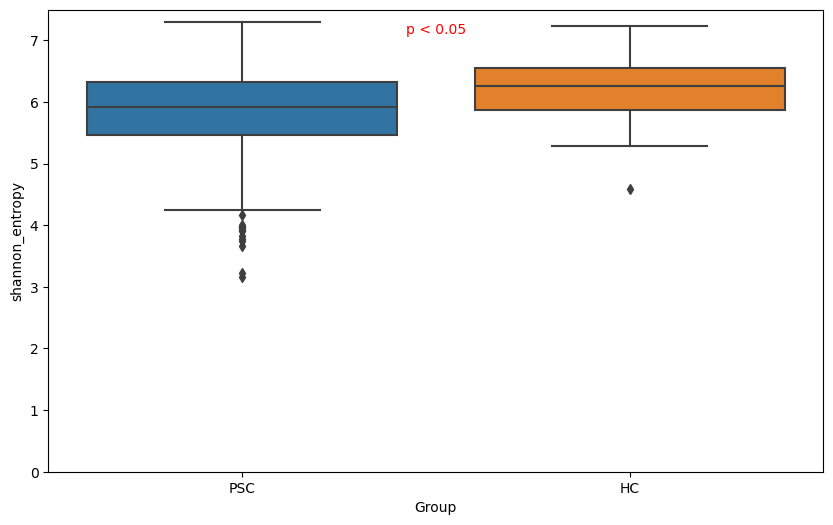

In [21]:
# Create boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='shannon_entropy', data=merged_data_stool)
plt.text(0.5, merged_data_stool['shannon_entropy'].max(), 'p < 0.05', ha='center', va='top', color='red')
plt.ylim(0)
# Show the plot
plt.savefig('./results/alpha_diversity_stool.png', dpi=300, bbox_inches='tight')
plt.show()

# Beta-diversity

In [36]:
#Beta diversity for ASV
!qiime diversity beta \
  --i-table ./results/norm_merged_ASV_abundances.qza \
  --p-metric braycurtis \
  --o-distance-matrix ./results/rarefied_asv_beta_diversity.qza

Saved DistanceMatrix to: ./results/rarefied_asv_beta_diversity.qza


In [37]:
!qiime diversity pcoa \
  --i-distance-matrix ./results/rarefied_asv_beta_diversity.qza \
  --o-pcoa ./results/rarefied_asv_pcoa_result.qza

Saved PCoAResults to: ./results/rarefied_asv_pcoa_result.qza


In [53]:
#Beta diversity for ASV
!qiime diversity beta \
  --i-table ./results/norm_merged_ASV_abundances_stool.qza \
  --p-metric braycurtis \
  --o-distance-matrix ./results/rarefied_asv_beta_diversity_stool.qza

Saved DistanceMatrix to: ./results/rarefied_asv_beta_diversity_stool.qza


In [54]:
!qiime diversity pcoa \
  --i-distance-matrix ./results/rarefied_asv_beta_diversity_stool.qza \
  --o-pcoa ./results/rarefied_asv_pcoa_result_stool.qza

Saved PCoAResults to: ./results/rarefied_asv_pcoa_result_stool.qza


In [23]:
# Load the PCoA results from the Qiime artifact
pcoa_results = Artifact.load('./results/rarefied_asv_pcoa_result_stool.qza')

# Convert the PCoA results to a pandas DataFrame
pcoa = pcoa_results.view(OrdinationResults)

In [24]:
pcoa_df = pcoa.samples

In [25]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [26]:
# Calculate the covariance matrix
cov_matrix = np.cov(pcoa_df.T)

# Calculate the eigenvalues of the covariance matrix
eigenvalues = np.linalg.eigvalsh(cov_matrix)

# Calculate the total variance
total_variance = sum(eigenvalues)

# Calculate the percentage of variance explained by each principal component
explained_variance_ratio = (eigenvalues / total_variance) * 100

In [27]:
first_cmp = explained_variance_ratio[-1]
second_scmp = explained_variance_ratio[-2]

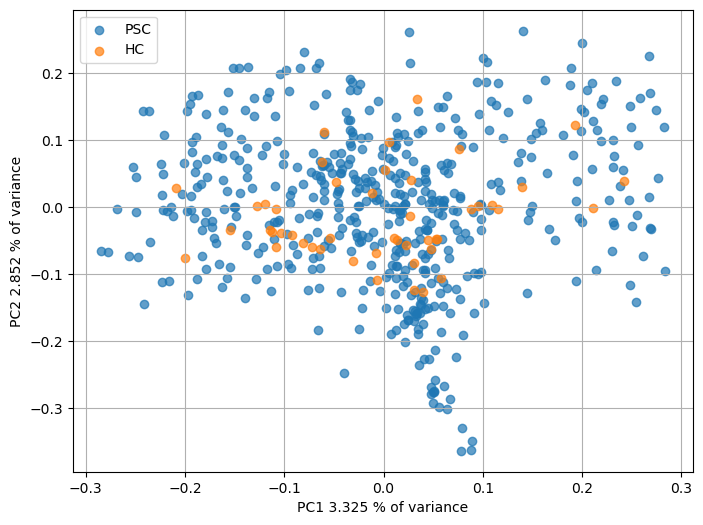

In [28]:
# Extract the 'pos_neg' column from the metadata DataFrame
clusters = meta_df['Group']
color_palette = {'PSC': 'blue', 'HC': 'green'} 

plt.figure(figsize=(8, 6))

# Plot each cluster separately
for cluster in clusters.unique():
    mask = (clusters == cluster)
    plt.scatter(pcoa_df.loc[mask, 0], pcoa_df.loc[mask, 1], label=cluster, alpha=0.7)

plt.xlabel(f"PC1 {first_cmp:.3f} % of variance")
plt.ylabel(f"PC2 {second_scmp:.3f} % of variance")
plt.legend()
plt.grid(True)
plt.savefig('./results/pca_plot_beta_stool.png', dpi=300, bbox_inches='tight')
plt.show()